# python_feature_scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("data_sets/data1/cleansed.csv")
data

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,...,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,...,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,...,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,...,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,...,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,4,200004,0,38.0,Self Enquiry,1,8.0,Small Business,Male,2,...,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,...,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4859,4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,...,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4860,4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,...,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4861,4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,...,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [46]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,38.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4859,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4860,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4861,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# Normalization

In [49]:
x=data['MonthlyIncome']
x_new=(x-np.mean(x))/(x.max()-x.min())
x_new

0      -0.026893
1      -0.035728
2      -0.066851
3      -0.058466
4      -0.052743
          ...   
4858    0.030264
4859   -0.024651
4860    0.083951
4861   -0.034100
4862    0.004312
Name: MonthlyIncome, Length: 4863, dtype: float64

# Min-Max Scaler

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

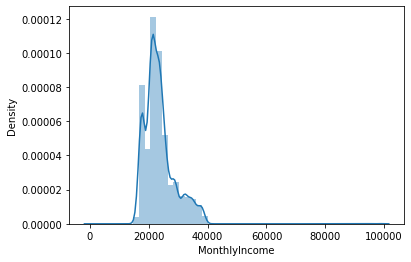

In [12]:
sns.distplot(data['MonthlyIncome'])

In [50]:
y=data['MonthlyIncome']
y_new=(y-y.min())/(y.max()-y.min())

In [51]:
y_new

0       0.204683
1       0.195848
2       0.164725
3       0.173110
4       0.178832
          ...   
4858    0.261840
4859    0.206925
4860    0.315527
4861    0.197475
4862    0.235887
Name: MonthlyIncome, Length: 4863, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
ms=MinMaxScaler()
y_n=ms.fit_transform(data[['MonthlyIncome']])

In [25]:
y_n

array([[0.20468273],
       [0.19584758],
       [0.16472491],
       ...,
       [0.31552653],
       [0.19747538],
       [0.2358873 ]])

# Standardization- Z-Score

<AxesSubplot:xlabel='Age', ylabel='Density'>

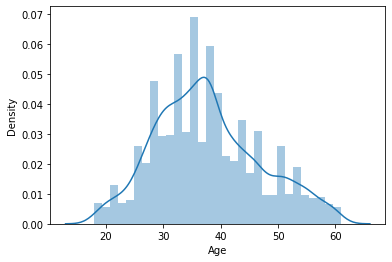

In [27]:
sns.distplot(data['Age'])

In [30]:
data['Age'].skew()

0.38164109098551313

In [36]:
y=data['Age']
s=(y-np.mean(y))/np.std(y)

In [38]:
s

0       0.365095
1       1.244470
2      -0.074592
3      -0.514280
4       0.035330
          ...   
4858    1.244470
4859   -1.063889
4860    1.574235
4861   -2.053185
4862   -0.184514
Name: Age, Length: 4863, dtype: float64

In [42]:
from scipy.stats import zscore 

In [44]:
zscore(data['Age'])

0       0.365095
1       1.244470
2      -0.074592
3      -0.514280
4       0.035330
          ...   
4858    1.244470
4859   -1.063889
4860    1.574235
4861   -2.053185
4862   -0.184514
Name: Age, Length: 4863, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

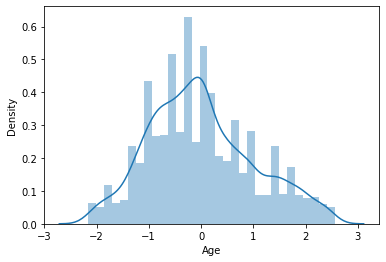

In [61]:
sns.distplot(zscore(data['Age']))

# Standardscaler

In [63]:
from sklearn.preprocessing import StandardScaler

In [69]:
ss=StandardScaler()
y_new=ss.fit_transform(data[['Age']])
y_new

array([[ 0.36509509],
       [ 1.24446973],
       [-0.07459224],
       ...,
       [ 1.57423522],
       [-2.05318519],
       [-0.18451407]])

<AxesSubplot:ylabel='Density'>

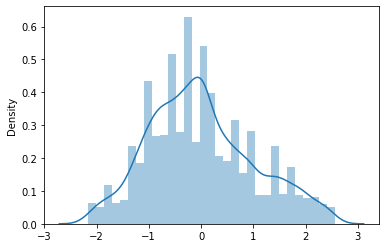

In [70]:
sns.distplot(y_new)

# Absolute Maximum Scaling

In [52]:
y=data['Age']
y_new=y/max(y)

In [54]:
y_new

0       0.672131
1       0.803279
2       0.606557
3       0.540984
4       0.622951
          ...   
4858    0.803279
4859    0.459016
4860    0.852459
4861    0.311475
4862    0.590164
Name: Age, Length: 4863, dtype: float64

# Robust Scaling

In [55]:
from scipy.stats import iqr

In [58]:
q1=iqr(y,interpolation="midpoint")
y_new=(y-np.median(y))/q1

In [60]:
y_new

0       0.333333
1       1.000000
2       0.000000
3      -0.333333
4       0.083333
          ...   
4858    1.000000
4859   -0.750000
4860    1.250000
4861   -1.500000
4862   -0.083333
Name: Age, Length: 4863, dtype: float64

# Transformation

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

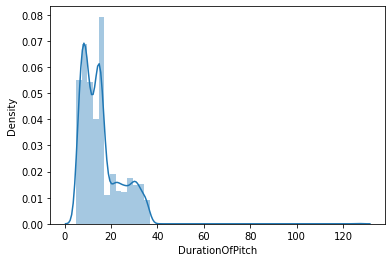

In [76]:
sns.distplot(data['DurationOfPitch'])

In [73]:
np.log(data['DurationOfPitch'])

0       1.791759
1       2.639057
2       2.079442
3       2.197225
4       2.079442
          ...   
4858    2.197225
4859    3.433987
4860    2.833213
4861    2.772589
4862    2.639057
Name: DurationOfPitch, Length: 4863, dtype: float64

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

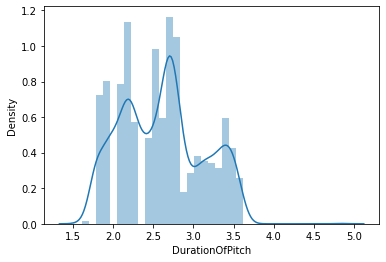

In [75]:
sns.distplot(np.log(data['DurationOfPitch']))